In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers,losses,preprocessing
import os
import numpy as np
import pandas as pd

import zipfile

In [2]:
#dataset_dir='C:\\Users\\Manish\\Desktop\\INT 247\\INT 248\\Project_2\\Project\\832492_1421897_bundle_archive.zip'##############
#with zipfile.ZipFile(dataset_dir,'r')as zip_ref:
#    zip_ref.extractall(r"C:\\Users\\Manish\\Desktop\\INT 247\\INT 248\\Project_2\\Project")


In [3]:
def classes_from_directory(location):
    dataset_dir=location
    return os.listdir(dataset_dir)

In [4]:
def preprocessing_image_dataset(location,image_size=(224,224),batch_size=30):
    data=tf.keras.preprocessing.image_dataset_from_directory(
    location,
    image_size=image_size,
    batch_size=batch_size)
    return data

In [5]:
def count_number_of_batches(data_after_preprocessing):
    number_of_batches=tf.data.experimental.cardinality(data_after_preprocessing)
    return number_of_batches
    

In [6]:
def image_plotting(data_after_preprocessing,class_names):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,10))
    for image_batch,label_batch in data_after_preprocessing.take(1):
        for i in range(30):
            plt.subplot(6,6,i+1)
            plt.imshow(image_batch[i]/255.0)
            plt.title(class_names[label_batch[i]])
            plt.axis('off')

In [7]:
def batch_shape(data_after_preprocessing):
    for image,label in data_after_preprocessing.take(1):
        print(image.shape)
        print(label.shape)
        break

In [8]:
def image_data(data_after_preprocessing):
    image_data_list=[]
    label_data_list=[]
    for image_batch,label_batch in data_after_preprocessing:
        image_data_list.append(image_batch)
        label_data_list.append(label_batch)
    final_image_data=np.concatenate(image_data_list)
    final_label_data=np.concatenate(label_data_list)
    return final_image_data,final_label_data

In [9]:

def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))


In [10]:
def MyModel():
    model_pre_pro = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(224, 224),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
])
    data_augmentation=tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),])
    
    base_model=base_model = tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False)
   
    base_model.trainable=False
    
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    
    prediction_layer = tf.keras.Sequential([
                            tf.keras.layers.Dense(50,activation='softmax'),

        
    ])


    inputs=tf.keras.Input(shape=(224,224,3))
    x=model_pre_pro (inputs)
    x=data_augmentation(x)
    x=base_model(x,training=False)
    x=global_average_layer(x)
    x=tf.keras.layers.Dropout(0.2)(x)
    outputs=prediction_layer(x)
    return tf.keras.Model(inputs,outputs)

In [11]:
def get_label_info(x,y,label_names,current_name_index):
    label=label_names[current_name_index]
    label_data=x[y==current_name_index]
    return (label,label_data)
def separate(x,y,label_names):
    separated=[]
    print("Data Separation")
    for current_name_index in range(len(label_names)):
        separated.append(get_label_info(x,y,label_names,current_name_index))
    print('Done Succesfuly')
    return separated



In [12]:
location='//home//manish//Desktop//INT 247//INT 248//Project_2//Project//Bass'
class_names=classes_from_directory(location)
print("Classes Names Present in the Directory {}".format(repr(class_names)))

Classes Names Present in the Directory ['Pneumonia_CT', 'Covid_CT', 'Normal_CT']


In [13]:
#Data Preprocessing 
data_after_preprocessing=preprocessing_image_dataset(location)

Found 2034 files belonging to 3 classes.


In [14]:
#Number of Batches
batch_count=count_number_of_batches(data_after_preprocessing)
print("Total Number of batches are: {}".format(repr(batch_count.numpy())))

Total Number of batches are: 68


In [15]:
# Batch Shape
batch_shape(data_after_preprocessing)

(30, 224, 224, 3)
(30,)


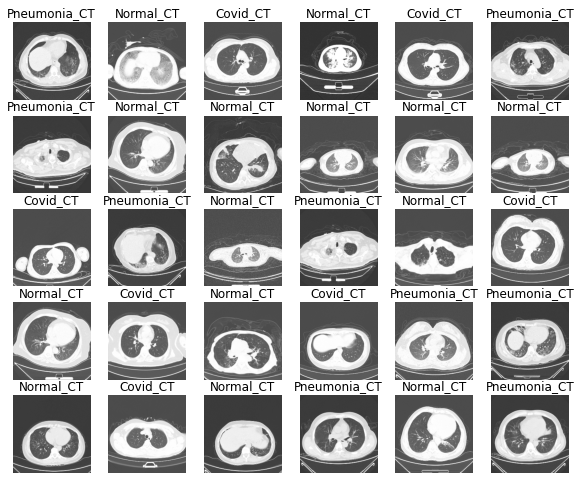

In [16]:
# Image Plotting
image_plotting(data_after_preprocessing,class_names)

In [17]:
# Appending Image Data and Label datain One List
image_train,label_train=image_data(data_after_preprocessing)



Found 1 files belonging to 1 classes.


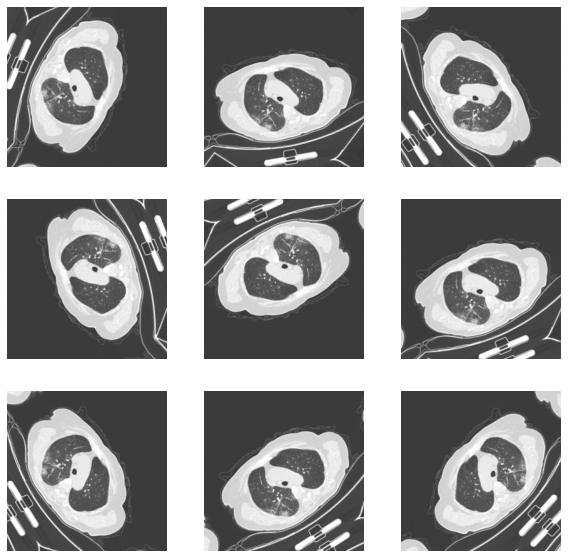

In [90]:
#Data Augmentation EFFECTS
data=tf.keras.preprocessing.image_dataset_from_directory(
    "//home//manish//Desktop//INT 247//INT 248//Project_2//Project//AUGMENTATION")
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])



import matplotlib.pyplot as plt

for image_batch,label_batch in data.take(1):
    plt.figure(figsize=(10,10))
    for i in range(9):
        aug=data_augmentation(image_batch)
        plt.subplot(3,3,i+1)
        plt.imshow(aug[0]/255)
        plt.axis('off')

In [18]:
print(image_train.shape)
print(label_train.shape)

(2034, 224, 224, 3)
(2034,)


In [19]:
model=MyModel()
model.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 50)                25650 

In [20]:
features=model.predict(image_train)

In [21]:
print(features.shape)
print(label_train.shape)

(2034, 50)
(2034,)


In [22]:
pd.DataFrame(features).to_csv('Features.csv',index=False)
pd.DataFrame(label_train).to_csv('Labels.csv',index=False)
print('File written ...')

File written ...


In [23]:
features=pd.read_csv('Features.csv')
labels=pd.read_csv('Labels.csv')
features=features.values.tolist()
labels=labels.values.tolist()
labels=np.array(labels)
features=np.array(features)
labels=labels.flatten()

rows,columns=features.shape
print(features[0:5,0:2])
print(labels[0:50])

[[0.3525348  0.8402563 ]
 [0.27741855 1.0139201 ]
 [0.4262421  1.0285068 ]
 [0.31043047 1.0450213 ]
 [0.24795648 0.8980244 ]]
[0 0 0 1 2 1 2 1 0 2 0 0 2 2 0 2 0 1 0 1 2 0 1 0 2 1 1 0 1 2 2 0 1 2 2 2 1
 0 0 2 0 2 0 2 1 0 0 1 0 0]


Data Separation
Done Succesfuly
3


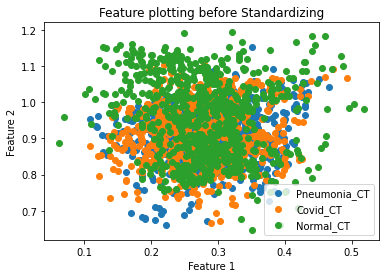

In [24]:
separated_data=separate(features,labels,class_names)
print(len(separated_data))
import matplotlib.pyplot as plt
for label,label_data in separated_data:
    col1=label_data[:,0]
    col2=label_data[:,1]
    plt.scatter(col1,col2,label=label)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()  # adds legend to plot
plt.title('Feature plotting before Standardizing')
plt.show()

In [25]:
## Feature data Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
features_std=sc.fit_transform(features)


Data Separation
Done Succesfuly
3


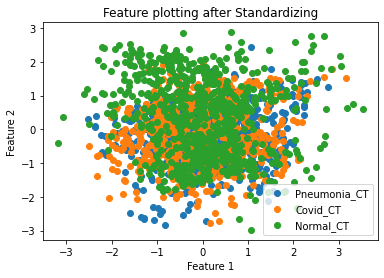

In [26]:
separated_data=separate(features_std,labels,class_names)
print(len(separated_data))
import matplotlib.pyplot as plt
for label,label_data in separated_data:
    col1=label_data[:,0]
    col2=label_data[:,1]
    plt.scatter(col1,col2,label=label)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()  # adds legend to plot
plt.title('Feature plotting after Standardizing')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features_std,labels,test_size=0.25,random_state=20)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)



(1525, 50) (1525,)
(509, 50) (509,)


In [31]:
from sklearn.svm import SVC

In [32]:
svm_model=SVC(kernel='poly')

In [33]:
svm_model.fit(x_train,y_train)

SVC(kernel='poly')

In [34]:
y_pred=svm_model.predict(x_test)
y_train_pred=svm_model.predict(x_train)

In [35]:
print("")
print("Intercepts: {} ".format(svm_model.intercept_))
print('R2 Score of Training: {}'.format(svm_model.score(x_train,y_train)))
print('R2 Score of Testing: {}'.format(svm_model.score(x_test,y_test)))
print("")


Intercepts: [0.14550914 0.35647554 0.25066951] 
R2 Score of Training: 1.0
R2 Score of Testing: 0.9921414538310412



In [36]:
for i in range(len(y_pred)):
    print('Target      Predicted    Result')
    print(' {}             {}          {}'.format(y_test[i],y_pred[i],(y_test[i]==y_pred[i])))

Target      Predicted    Result
 1             1          True
Target      Predicted    Result
 0             0          True
Target      Predicted    Result
 0             0          True
Target      Predicted    Result
 1             1          True
Target      Predicted    Result
 2             2          True
Target      Predicted    Result
 1             1          True
Target      Predicted    Result
 2             2          True
Target      Predicted    Result
 2             2          True
Target      Predicted    Result
 0             0          True
Target      Predicted    Result
 1             1          True
Target      Predicted    Result
 2             2          True
Target      Predicted    Result
 2             2          True
Target      Predicted    Result
 0             0          True
Target      Predicted    Result
 2             2          True
Target      Predicted    Result
 0             0          True
Target      Predicted    Result
 2             2       

In [37]:
import sklearn.metrics as metrics
print('For Standardized Data')
print("Mean Absolute Error for Testing: {}".format(metrics.mean_absolute_error(y_test,y_pred)) )
print("Mean Squared Error for Testing: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("Root mean squared error for Testing: {}".format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))

For Standardized Data
Mean Absolute Error for Testing: 0.011787819253438114
Mean Squared Error for Testing: 0.019646365422396856
Root mean squared error for Testing: 0.14016549298025122


In [38]:
import sklearn.metrics as metrics
print('For Standardized Data')
print("Mean Absolute Error for Training: {}".format(metrics.mean_absolute_error(y_train,y_train_pred)) )
print("Mean Squared Error for Training: {}".format(metrics.mean_squared_error(y_train,y_train_pred)))
print("Root mean squared error for Training: {}".format(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))))

For Standardized Data
Mean Absolute Error for Training: 0.0
Mean Squared Error for Training: 0.0
Root mean squared error for Training: 0.0


In [91]:
from sklearn.metrics import accuracy_score
print('For Standardized Data')
print('Training accuracy:',accuracy_score(y_train_pred,y_train))
print('Testing accuracy:',accuracy_score(y_pred,y_test))

For Standardized Data
Training accuracy: 1.0
Testing accuracy: 0.9921414538310412


In [93]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_model, x_train, y_train, scoring="neg_mean_squared_error", cv=5)
print("Cross Validation Scores for 5 folds \nScoring on Negative Mean Squared Error")
display_scores(np.sqrt(-scores))

Cross Validation Scores for 5 folds 
Scoring on Negative Mean Squared Error
Scores: [0.11451967 0.19835388 0.11451967 0.30835364 0.        ]
Mean: 0.147
Std: 0.102


In [129]:
print('Misclassified Samples in Training: {}'.format(np.sum(y_train_pred!=y_train)))
print('Misclassified Samples in Testing: {}'.format(np.sum(y_pred!=y_test)))
     

Misclassified Samples in Training: 0
Misclassified Samples in Testing: 4


# XGBoost Classifier 

In [95]:
import xgboost as xgb
model = xgb.XGBClassifier()
params = {'max_depth': range(2, 10)}

from sklearn.model_selection import GridSearchCV
cv_model = GridSearchCV(model, params, cv=5)

# predefined data and labels
cv_model.fit(x_train, y_train)
print('Best max_depth: {}\n'.format(
  cv_model.best_params_['max_depth']))

Best max_depth: 8



In [99]:
xgb_pred=cv_model.predict(x_test)
xgb_pred_train=cv_model.predict(x_train)

In [101]:

print("")

print('R2 Score of Training: {}'.format(cv_model.score(x_train,y_train)))
print('R2 Score of Testing: {}'.format(cv_model.score(x_test,y_test)))
print("")


R2 Score of Training: 1.0
R2 Score of Testing: 0.9960707269155207



In [102]:
print("Mean Absolute Error for Testing: {}".format(metrics.mean_absolute_error(y_test,xgb_pred)) )
print("Mean Squared Error for Testing: {}".format(metrics.mean_squared_error(y_test,xgb_pred)))
print("Root mean squared error for Testing: {}".format(np.sqrt(metrics.mean_squared_error(y_test,xgb_pred))))

For Standardized Data
Mean Absolute Error for Testing: 0.003929273084479371
Mean Squared Error for Testing: 0.003929273084479371
Root mean squared error for Testing: 0.06268391408072227


In [103]:
print("Mean Absolute Error for Training: {}".format(metrics.mean_absolute_error(y_train,xgb_pred_train)) )
print("Mean Squared Error for Training: {}".format(metrics.mean_squared_error(y_train,xgb_pred_train)))
print("Root mean squared error for Training: {}".format(np.sqrt(metrics.mean_squared_error(y_train,xgb_pred_train))))

Mean Absolute Error for Training: 0.0
Mean Squared Error for Training: 0.0
Root mean squared error for Training: 0.0


In [104]:
print('Training accuracy:',accuracy_score(xgb_pred_train,y_train))
print('Testing accuracy:',accuracy_score(xgb_pred,y_test))

Training accuracy: 1.0
Testing accuracy: 0.9960707269155207


In [105]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(cv_model, x_train, y_train, scoring="neg_mean_squared_error", cv=5)
print("Cross Validation Scores for 5 folds \nScoring on Negative Mean Squared Error")
display_scores(np.sqrt(-scores))

Cross Validation Scores for 5 folds 
Scoring on Negative Mean Squared Error
Scores: [0.26239752 0.1717795  0.14025737 0.19835388 0.12803688]
Mean: 0.180
Std: 0.048


In [106]:
print('Misclassified Samples in Training: {}'.format(np.sum(xgb_pred_train!=y_train)))
print('Misclassified Samples in Testing: {}'.format(np.sum(xgb_pred!=y_test)))
     

Misclassified Samples in Training: 0
Misclassified Samples in Testing: 2


#  XGBoost Regressor

In [110]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [108]:
import numpy as np

from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

import xgboost as xgb
xgb_model = xgb.XGBRegressor()

params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=30, n_iter=100, cv=3, verbose=10, n_jobs=-1, return_train_score=True)



In [113]:
search.fit(x_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f62570843d0>,
                                        'max_depth': <scipy.s

In [114]:

report_best_scores(search.cv_results_, 1)

Model with rank: 1
Mean validation score: 0.897 (std: 0.004)
Parameters: {'gamma': 0.1313965193757351, 'learning_rate': 0.09196538131564866, 'max_depth': 4, 'n_estimators': 149, 'subsample': 0.6874690003539079}



In [115]:
xgbr_pred=search.predict(x_test)
xgbr_pred_train=search.predict(x_train)

In [124]:
print("")

print('R2 Score of Training and Accuracy: {}'.format(search.score(x_train,y_train)))
print('R2 Score of Testing and Accuracy: {}'.format(search.score(x_test,y_test)))
print("")


R2 Score of Training and Accuracy: 0.9831148809777359
R2 Score of Testing and Accuracy: 0.8950874670847826



In [119]:
print("Mean Absolute Error for Testing: {}".format(metrics.mean_absolute_error(y_test,xgbr_pred)) )
print("Mean Squared Error for Testing: {}".format(metrics.mean_squared_error(y_test,xgbr_pred)))
print("Root mean squared error for Testing: {}".format(np.sqrt(metrics.mean_squared_error(y_test,xgbr_pred))))

Mean Absolute Error for Testing: 0.18582426594142126
Mean Squared Error for Testing: 0.06744131258910456
Root mean squared error for Testing: 0.2596946526001345


In [120]:
print("Mean Absolute Error for Training: {}".format(metrics.mean_absolute_error(y_train,xgbr_pred_train)) )
print("Mean Squared Error for Training: {}".format(metrics.mean_squared_error(y_train,xgbr_pred_train)))
print("Root mean squared error for Training: {}".format(np.sqrt(metrics.mean_squared_error(y_train,xgbr_pred_train))))

Mean Absolute Error for Training: 0.08013937524107637
Mean Squared Error for Training: 0.0114363650797671
Root mean squared error for Training: 0.10694094201832664


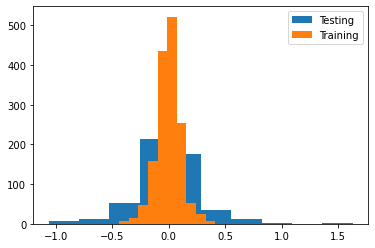

In [139]:
plt.hist((xgbr_pred-y_pred),label='Testing')
plt.hist((y_train-xgbr_pred_train),label='Training')
plt.legend()
plt.show()